In [1]:
import random
import gtdynamics as gtd
from gtdynamics import ContactGoal, PointOnLink, Slice, Interval
from gtsam import Pose3, Point3

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import graph
from matplotlib.pyplot import figure


# Create the graph of the rockwall that the robot will climb
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

def points_from_image():

    points = [[513, 32, 0.0], [575, 92, 0.0], [535, 119, 0.0], [511, 72, 0.0], [500, 105, 0.0],
              [485, 74, 0.0], [486, 49, 0.0], [446, 88, 0.0], [421, 59, 0.0], [425, 113, 0.0], [416, 105, 0.0],
              [457, 144, 0.5], [511, 173, 1.1], [447, 173, 1.1], [379, 81, -0.4], [319, 81, -0.4], [339, 92, -0.8],
              [319, 111, -0.9], [295, 103, -0.1], [281, 94, 0.1], [282, 123, 1.0],
              [376, 123, -0.1], [321, 129, 0.0], [300, 150, 1.0], [318, 164, 1.9], [348, 159, 1.4], [375, 179, 1.8],
              [386, 145, 1.0], [353, 227, 2.0], [311, 270, 2.0], [256, 224, 2.0], [230, 263, 2.0],
              [425, 203, 1.6], [489, 229, 1.1], [427, 271, 1.5], [369, 286, 1.8], [431, 325, 1.4],
              [525,207, 0.8], [541, 237, 0.9], [596, 193, 0.4], [600, 264, 0.75],
              [564, 293, 1.0], [510, 242, 1.0], [498, 276, 1.0],
              [594, 326, 0.8], [426, 355, 1.3], [388, 347, 1.6], [376, 371, 1.0],
              [489, 371, 0.5], [469, 360, 0.8],
              [326, 326, 1.9], [316, 367, 1.4], [303, 335, 1.7], [283, 364, 1.3], [251, 323, 1.5], [257, 293, 2.0],
              [205, 279, 1.8], [231, 341, 1.5], [198, 316, 1.6], [207, 387, 1.2],
              [265, 155, 1.9], [252, 136, 1.6], [254, 109, 1.3], [242, 92, 0.4], [228, 135, 0.75],
              [208, 123, 0.4], [186, 108, 0.8], [180, 145, 0.2], [149, 128, 0.6], [141, 160, 0.8], [228, 168, 1.0],
              [229, 191, 1.9], [189, 229, 1.9], [195, 178, 0.5], [166, 261, 1.9], [170, 353, 0.0], [139, 312, 0.5],
              [120, 356, 0.4], [73, 341, 1.0], [76, 382, 1.0], [33, 405, 0.4], [65, 299, 1.0], [39, 284, 1.0],
              [156, 165, 0.5], [147, 224, 1.5], [127, 201, 1.0], [122, 127, 1.0], [120, 161, 1.1], [101, 184, 1.3],
              [109, 236, 1.2], [111, 277, 1.0], [80, 275, 1.1], [74, 228, 1.5], [87, 133, 1.4], [61, 154, 1.75],
              [37, 142, 1.5], [43, 211, 1.6], [25, 187, 1.0], [10, 188, 0.0], [22, 285, 0.75], [13, 309, 0.5],
              [14, 244, 0.5], [20, 360, 0.5], [29, 324, 0.8]]

    points = np.array(points)
    
    y_height = 9
    x_height = 3
    z_height = 1
    
    y_height = 15
    x_height = 5
    z_height = 1.5
    
    y_height = 15
    x_height = 10
    z_height = 1.5
    
    # y_height = 30
    # x_height = 10
    # z_height = 3

    # scale for 4ft long arms
    points[:, 0] = points[:, 0] / (616/y_height)  # 616 -> 30
    points[:, 1] = points[:, 1] / (423/x_height)  # 423 - > 10
    points[:, 2] = points[:, 2] / (3 / z_height) # 3 (-1 - 2ft )

    # flip x axis so that it goes 0 to 30, down to up
    points[:, 0] = np.max(points[:, 0]) - points[:, 0]

    return points


def get_random_points(num_points):

    # robots arms are 2ft long - 1ft per link

    points = []
    for pt in range(num_points):

        # climbing wall = 10ft X 30ft, at most 1.5 ft change in z axis
        rand_x = random.randrange(0, 100)
        rand_y = random.randrange(0, 300)
        rand_z = random.randrange(0, 10)

        # randrange needed intergers, but divide to get better data

        rand_x = rand_x / 10
        rand_y = rand_y / 10
        rand_z = rand_z / 10

        points.append([rand_x, rand_y, rand_z])

    points = np.array(points)
    return points


def plot_points(points):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    x_scale = 0.68
    y_scale = 1.0
    z_scale = 0.0048 * 100

    # x_scale = 1.0
    # y_scale = 1.0
    # z_scale = 1.0

    scale = np.diag([x_scale, y_scale, z_scale, 1.0])
    scale = scale * (1.0 / scale.max())
    scale[3, 3] = 1.0

    def short_proj():
        return np.dot(Axes3D.get_proj(ax), scale)

    ax.get_proj = short_proj

    ax.scatter(points[:, 1], points[:, 0], points[:, 2], marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # ax.view_init(elev, azimuth angle)
    ax.view_init(90, -90)  # X-Y Axis
    # ax.view_init(0, 180)  # Y-Z Axis

    plt.show()


ImportError: /usr/local/lib/python3.6/dist-packages/gtdynamics-1.0.0-py3.6.egg/gtdynamics/gtdynamics.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZNK10gtdynamics13DynamicsGraph19dynamicsFactorGraphERKNS_5RobotEiRKN5boost8optionalISt6vectorINS_11PointOnLinkESaIS7_EEEERKNS5_IdEE

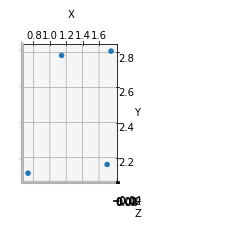

[[2.11850649 0.75650118 0.        ]
 [2.16720779 1.70212766 0.        ]
 [2.80032468 1.74940898 0.        ]
 [2.77597403 1.15839243 0.        ]]


In [107]:
points = points_from_image()
# Determine starting footholds
points = points[np.where(points[:, 0] < 3)]
# points = points[np.where(points[:, 1] > 1)]
points = points[np.where(points[:, 1] < 2)]
plot_points(points)
print(points)
# # right_hand = [1.49025974, 1.95744681, 0.33333333]
# right_hand = [1.31493506, 1.71631206, 0.33333333]
# right_foot = [0.86201299, 1.68085106, 0.3]
# left_hand =  [1.62175325, 1.62411348, 0.36666667]
# left_foot = [1.09577922, 1.46808511, 0.26666667]

# # ratios: 9, 3, 1
# right_hand = [1.68019481, 0.5248227,  0.0]
# right_foot = [1.30032468, 0.5106383,  0.0]
# left_hand =  [1.66558442, 0.34751773, 0.0]
# left_foot = [1.2711039,  0.22695035, 0.0]

# # ratios: 15, 5, 1.5
# right_hand = [2.80032468, 0.87470449, 0.0]
# right_foot = [2.16720779, 0.85106383, 0.0]
# left_hand = [2.77597403, 0.57919622, 0.0]
# left_foot = [2.11850649, 0.37825059, 0.0]

# ratios: 15, 10, 1.5
right_hand = [2.80032468, 1.74940898, 0.0]
right_foot = [2.16720779, 1.70212766, 0.0]
left_hand = [2.77597403, 1.15839243, 0.0]
left_foot = [2.11850649, 0.75650118, 0.0]

In [108]:
# try to automate finding start footholds, didn't work

# def assign_holds(start, points):
#     # find 4 points closest to start
#     # dists = (points - start)**2
#     dists = np.sum((points - start)**2, axis=1)
#     idxs = np.argsort(dists)[0:4]
#     start_nodes = points[idxs]
#     # print(start_nodes)
#     print("Pick holds:")
#     print(dists[idxs])
#     # pick best point for each hand/foot
#     # hands will be highest 2 in the y axis
#     holds_idx = np.argsort(start_nodes[:,0])
#     hands = start_nodes[holds_idx[-2:]]
#     # print(hands)
#     # right is the largest in the x-axis
#     right_hand = hands[np.argmax(hands[:, 1])]
#     # left is the lowest in the x-axis
#     left_hand = hands[np.argmin(hands[:, 1])]
#     # feet are lowest 2 in y axis
#     feet = start_nodes[holds_idx[0:2]]
#     # print(feet)
#     # right is the largest in the x-axis
#     right_foot = feet[np.argmax(feet[:, 1])]
#     # left is the lowest in the x-axis
#     left_foot = feet[np.argmin(feet[:, 1])]
#     print("rh", right_hand)
#     print("lh", left_hand)
#     print("rf", right_foot)
#     print("lf", left_foot)
#     return right_hand, left_hand, right_foot, left_foot

In [109]:
# Pick a random goal
robot = gtd.CreateRobotFromFile(gtd.URDF_PATH + "/quad_climb_robot.urdf"); # robot object

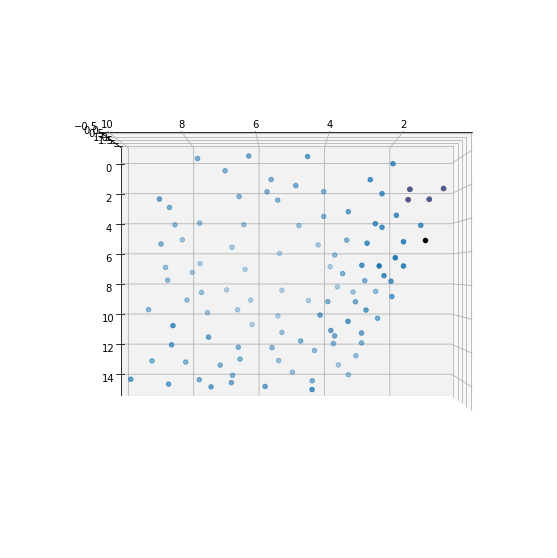

In [110]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

points = points_from_image()
# points[:, 2] = points[:, 2] + 300
# points = (points / 50) / 32

# # print(points[:, 2])
# def f(x, y):
#     return -(abs(x) + abs(y))

#ax.plot_trisurf(points[:, 1], points[:, 2], points[:, 0],
               #cmap='viridis', edgecolor='none');
ax.scatter3D(points[:, 1], points[:, 2], points[:, 0])

starting_points = np.asarray([tuple(left_foot), tuple(right_foot), tuple(left_hand), tuple(right_hand)])

# # define goal
# found = False
# goal = random.choice(points)
# while(not found):
#     found = True
#     for point in starting_points:
#         if np.array_equal(goal, point):
#             found = False
#             goal = random.choice(points)
# print(goal)
# goal_point = goal
# goal_point = [4.6461039,  0.87234043, 1.0]
goal_point = [5.08441558, 0.96453901, 1.6]

# starting_points = np.asarray([tuple([.2, 3.76, 0.0]), tuple([.28, 4.88, 0.01]), tuple([1.22, 3.08, 0.035]), tuple([1.48, 4.56, 0.03])])
# starting_points[:, 2] = starting_points[:, 2] + 6
# starting_points = starting_points / 32
ax.scatter3D(starting_points[:, 1], starting_points[:, 2], starting_points[:, 0], color='r')

# goal_point = np.asarray((5.300e+00, 3.100e+00, 3.800e-02))
# goal_point[2] = goal_point[2] + 6
# goal_point = goal_point / 32
ax.scatter3D(goal_point[1], goal_point[2], goal_point[0], color='k')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
#ax.set_xlim(0, 600)
# ax.set_ylim(0, .4)
ax.view_init(180, 90)
# ax.view_init(90, -90)  # X-Y Axis
#ax.set_zlim(0, 600)
#figure(figsize=(8, 6), dpi=80)

In [111]:
# points = points_from_image()
# points = points / 50
# points[(points[:, 0] >4) & (points [:, 1] > 3) & (points[:, 1] < 5)]

In [112]:
# starting_config = [tuple([.2, 3.76, 0.0]), tuple([.28, 4.88, 0.01]), tuple([1.22, 3.08, 0.035]), tuple([1.48, 4.56, 0.03])] #right foot, left foot,  right hand, left hand

In [114]:
# %load_ext autoreload

# %autoreload 2
import find_holds
# find_holds.get_possible_holds(points, starting_config)
robot = gtd.CreateRobotFromFile(gtd.URDF_PATH + "/quad_climb_robot.urdf"); # robot object
r_hand = "grab0" # leg 1 = red
l_hand = "grab1" # leg 2 = purple
r_foot = "grab2" # leg 3 = green
l_foot = "grab3" # leg 4 = blue
# v1 - use 0,0,0
com = [0,0,0]
LH = PointOnLink(robot.link(l_hand), com)
LF = PointOnLink(robot.link(l_foot), com)
RH = PointOnLink(robot.link(r_hand), com)
RF = PointOnLink(robot.link(r_foot), com)

print(robot.link(l_hand).id())
print(robot.link(r_hand).id())
print(robot.link(l_foot).id())
print(robot.link(r_foot).id())

# # ratios: 9, 3, 1
# right_hand = [1.68019481, 0.5248227,  0.0]
# right_foot = [1.30032468, 0.5106383,  0.0]
# left_hand =  [1.66558442, 0.34751773, 0.0]
# left_foot = [1.2711039,  0.22695035, 0.0]

# # ratios: 15, 5, 1.5
# right_hand = [2.80032468, 0.87470449, 0.0]
# right_foot = [2.16720779, 0.85106383, 0.0]
# left_hand = [2.77597403, 0.57919622, 0.0]
# left_foot = [2.11850649, 0.37825059, 0.0]

# ratios: 15, 10, 1.5
right_hand = [2.80032468, 1.74940898, 0.0]
right_foot = [2.16720779, 1.70212766, 0.0]
left_hand = [2.77597403, 1.15839243, 0.0]
left_foot = [2.11850649, 0.75650118, 0.0]

# switch to correct axis for IK
right_hand = [right_hand[1], right_hand[0], right_hand[2]]
right_foot = [right_foot[1], right_foot[0], right_foot[2]]
left_hand = [left_hand[1], left_hand[0], left_hand[2]]
left_foot = [left_foot[1], left_foot[0], left_foot[2]]

# # x, y, z
# WORKS
# right_hand = [ 1.5,  0.40246222, 0.33333333]
# right_foot = [ 1.5, -0.40246379, 0.3]
# left_hand =  [0.5,  0.402463,   0.36666667]
# left_foot = [0.5, -0.402463,   0.26666667]

# DOES NOT WORK - DOES NOT LIKE THAT LEFT/RIGHT ARE LESS THAN 1M APART
right_hand = [ 1.74,  0.40246222, 0.33333333]
right_foot = [ 1.70, -0.40246379, 0.3]
left_hand =  [1.15839243,  0.402463,   0.36666667] # THIS IS THE POINT THAT CAUSES AN ISSUE
left_foot = [0.75650118, -0.402463,   0.26666667]

# # WORKS
# right_hand = [ 1.74,  0.40246222, 0.33333333]
# right_foot = [ 1.70, -0.40246379, 0.3]
# left_hand =  [0.74,  0.402463,   0.36666667]
# left_foot = [0.7, -0.402463,   0.26666667]

# v2 - use the original location
# LH = PointOnLink(robot.link(l_hand), robot.link(l_hand).bMcom().translation())
# LF = PointOnLink(robot.link(l_foot), left_foot)
# RH = PointOnLink(robot.link(r_hand), right_hand)
# RF = PointOnLink(robot.link(r_foot), right_foot)
contact_goals = [
                    ContactGoal(LH, left_hand),
                    ContactGoal(LF, left_foot),
                    ContactGoal(RH, right_hand),
                    ContactGoal(RF, right_foot),
                ]
params = gtd.KinematicsParameters()
params.lm_parameters.setVerbosityLM("LAMBDA")
kinematics = gtd.Kinematics(params)
result = kinematics.inverse(Slice(4), robot, contact_goals)
# print(result.__repr__("", gtd.GTDKeyFormatter))

print("ex: ", right_hand)
pose_after_ik_r_hand = gtd.Pose(result, robot.link(r_hand).id(), 4) # 4 for slice(4)
print(pose_after_ik_r_hand)

print("ex: ", left_hand)
pose_after_ik_l_hand = gtd.Pose(result, robot.link(l_hand).id(), 4)
print(pose_after_ik_l_hand)

print("ex: ", right_foot)
pose_after_ik_r_foot = gtd.Pose(result, robot.link(r_foot).id(), 4)
print(pose_after_ik_r_foot)

print("ex: ", left_foot)
pose_after_ik_l_foot = gtd.Pose(result, robot.link(l_foot).id(), 4)
print(pose_after_ik_l_foot)

passes_ik = all([goal.satisfied(result,k=4,tol=1e-3) for goal in contact_goals])
print(passes_ik)

16
12
8
4


AttributeError: module 'gtdynamics' has no attribute 'KinematicsParameters'

In [ ]:
path = find_holds.uniform_cost_search(points, np.asarray(starting_config), (5.300e+00, 3.100e+00, 3.800e-02))

In [ ]:
a, b = path
a

In [ ]:
b

In [ ]:
config_flow = [np.fromstring(i).reshape((4, 3)) for i in a]
config_flow  

In [ ]:
list(G.edges(data=True))[:-100]

In [ ]:
import networkx as nx
# initial_holds = np.asarray(starting_config).tostring()
initial_holds = np.asarray(starting_config).tobytes()
goal_hold = b'\x9a\x99\x99\x99\x99\x99\xc9?\x14\xaeG\xe1z\x14\x0e@\x00\x00\x00\x00\x00\x00\x00\x00\xecQ\xb8\x1e\x85\xeb\xd1?\x85\xebQ\xb8\x1e\x85\x13@{\x14\xaeG\xe1z\x84?333333\x15@\xcd\xcc\xcc\xcc\xcc\xcc\x08@\xdb\xf9~j\xbct\xa3?\x85\xebQ\xb8\x1e\x85\xeb?\xe1z\x14\xaeG\xe1\x10@\xfc\xa9\xf1\xd2Mb\xa0?'
nodes_to_goal = list(nx.all_simple_paths(G, source=initial_holds, target=goal_hold))[0]
path_to_goal = [np.fromstring(i) for i in list(nx.all_simple_paths(G, source=initial_holds, target=goal_hold))[0]]
nodes_to_goal

In [ ]:
print(len(config_flow))

colors = ['r', 'b', 'g', 'c']

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

points = graph.points_from_image()
points[:, 2] = points[:, 2] + 300
points = (points / 50) / 32

print(points[:, 2])
def f(x, y):
    return -(abs(x) + abs(y))

#ax.plot_trisurf(points[:, 1], points[:, 2], points[:, 0],
               #cmap='viridis', edgecolor='none');
ax.scatter3D(points[:, 1], points[:, 2], points[:, 0])
# for i in config_flow:
# #     val = i.reshape((4, 3))
#     ax.scatter3D(i[2:3, 1], i[2:3, 2] + 6, i[2:3, 0])
#     break

for i, j in zip(config_flow[:-1], config_flow[1:]):
    #print(i, j)
    config_changes = np.nonzero(i - j)
    k = config_changes[0][0]
    v1 = i[config_changes] / 32
    v2 = j[config_changes] / 32
    if len(v1) == 2:
        v1 = (v1[0], v1[1], .03 / 32)
        v2 = (v2[0], v2[1], .03 / 32)
    v1 = (v1[0], v1[1], v1[2] + 0.1875)
    v2 = (v2[0], v2[1], v2[2] + 0.1875)
    #print(v1, v2)
    ax.plot([v1[1], v2[1]], [v1[2], v2[2]], [v1[0], v2[0]], color = colors[k])
    k = k + 1
    #break
    #break
starting_points = np.asarray([tuple([.2, 3.76, 0.0]), tuple([.28, 4.88, 0.01]), tuple([1.22, 3.08, 0.035]), tuple([1.48, 4.56, 0.03])])
starting_points[:, 2] = starting_points[:, 2] + 6
starting_points = starting_points / 32
ax.scatter3D(starting_points[:, 1], starting_points[:, 2], starting_points[:, 0], color='r')

goal_point = np.asarray((5.300e+00, 3.100e+00, 3.800e-02))
goal_point[2] = goal_point[2] + 6
goal_point = goal_point / 32
ax.scatter3D(goal_point[1], goal_point[2], goal_point[0], color='k')


#ax.scatter3D(config_flow[-1][:, 1], config_flow[-1][:, 2] + 0.1875, config_flow[-1][:, 0])
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
#ax.set_xlim(0, 600)
ax.set_ylim(0, .4)